<a href="https://colab.research.google.com/github/MuneneMutuma/Juja-River/blob/main/Juja_River_Twin_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juja River Twin Model Digital Image Processing Assignment

## Environment preparation

### Install OpenCV

In [ ]:
!pip install opencv-python gdown

### Import necessary modules

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import gdown

### Load Drive and get images

In [ ]:
drive_url = 'https://drive.google.com/drive/folders/1nqlkqf6xpJ658U-f2n2vkHsZv7-lSdUl'
gdown.download_folder(drive_url, output='Juja River Images')
%cd 'Juja River Images'

Retrieving folder contents


Processing file 1-uAdDNAxwfqSLmY1IujoLhY983iiNwqD ndarugu-1.jpeg
Processing file 1fYq7yIE1PlLllh_5AA3qonhugfaWB15K ndarugu-2.jpeg
Processing file 1Rog3EDUkyPahYY_PKuuDIoe4skTxVeXX ndarugu-3.jpeg
Processing file 12mCg5dSoqV3q-0qmJZO62hx5Ku3lqUS0 ndarugu-4.jpeg
Processing file 1nl1ir05diuadeojTqUw5DKdiB8mNuw4- ndarugu-5.jpeg
Processing file 1apVEqXhTVtryXAm66sWeuCYHKIdWld3i ndarugu-6.jpeg
Processing file 1wlywZl5sl-uLSrN3DgRUfqHbwe6lXmGF ndarugu-7.jpeg
Processing file 1pyrHwDxQgkcskxWLAPO0elHSSO7v-ttZ ndarugu-8.jpeg


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-uAdDNAxwfqSLmY1IujoLhY983iiNwqD
To: /content/Juja River Images/ndarugu-1.jpeg
100%|██████████| 448k/448k [00:00<00:00, 88.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fYq7yIE1PlLllh_5AA3qonhugfaWB15K
To: /content/Juja River Images/ndarugu-2.jpeg
100%|██████████| 636k/636k [00:00<00:00, 81.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Rog3EDUkyPahYY_PKuuDIoe4skTxVeXX
To: /content/Juja River Images/ndarugu-3.jpeg
100%|██████████| 626k/626k [00:00<00:00, 63.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12mCg5dSoqV3q-0qmJZO62hx5Ku3lqUS0
To: /content/Juja River Images/ndarugu-4.jpeg
100%|██████████| 639k/639k [00:00<00:00, 91.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nl1ir05diuadeojTqUw5DKdiB8mNuw4-
To: /content/Juja River Images/ndarugu-5.jpeg
100%|██████████| 533k/533k [00:

/content/Juja River Images



Download completed


## Image Processing

### Preprocessing

#### Load Image

In [ ]:
image = cv.imread('ndarugu-1.jpeg')

#### Denoise the image

In [ ]:
# denouse image using median filter with kernel of size 5
denoised_median = cv.medianBlur(image, 5)

denoised_gaussian = cv.GaussianBlur(image, (5,5), 2)

#### Gray Scale conversion, equalization, and edge detection

In [ ]:
# convert image to grayscale
gray_median = cv.cvtColor(denoised_median, cv.COLOR_BGR2GRAY)
gray_gaussian = cv.cvtColor(denoised_gaussian, cv.COLOR_BGR2GRAY)

# apply histogram equalization
equalized_median = cv.equalizeHist(gray_median)
equalized_gaussian = cv.equalizeHist(gray_gaussian)

# edge detection
edge_median = cv.Canny(gray_median, 85, 255)
edge_gaussian = cv.Canny(gray_gaussian, 85, 255)

#### Plotting the images

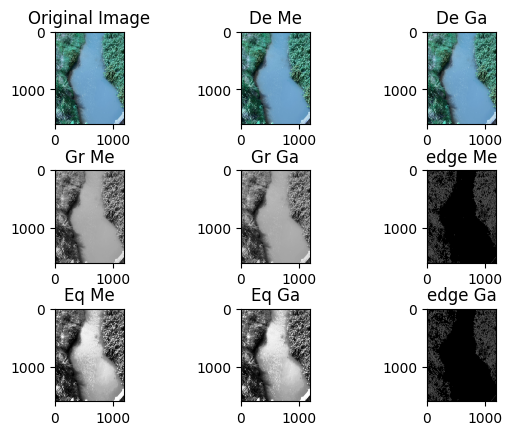

In [ ]:
plt.subplot(331), plt.imshow(image), plt.title('Original Image')
plt.subplot(332), plt.imshow(denoised_median), plt.title('De Me')
plt.subplot(333), plt.imshow(denoised_gaussian), plt.title('De Ga')
plt.subplot(334), plt.imshow(gray_median, cmap='gray'), plt.title('Gr Me')
plt.subplot(335), plt.imshow(gray_gaussian, cmap='gray'), plt.title('Gr Ga')
plt.subplot(336), plt.imshow(edge_median, cmap='gray'), plt.title('edge Me')
plt.subplot(337), plt.imshow(equalized_median, cmap='gray'), plt.title('Eq Me')
plt.subplot(338), plt.imshow(equalized_gaussian, cmap='gray'), plt.title('Eq Ga')
plt.subplot(339), plt.imshow(edge_gaussian, cmap='gray'), plt.title('edge Ga')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

#### Water flow patterns

In [ ]:
im4 = cv.imread('ndarugu-4.jpeg')
im5 = cv.imread('ndarugu-5.jpeg')
im6 = cv.imread('ndarugu-6.jpeg')

gray4 = cv.cvtColor(im4, cv.COLOR_BGR2GRAY)
gray5 = cv.cvtColor(im5, cv.COLOR_BGR2GRAY)
gray6 = cv.cvtColor(im6, cv.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Optical Flow Magnitude')

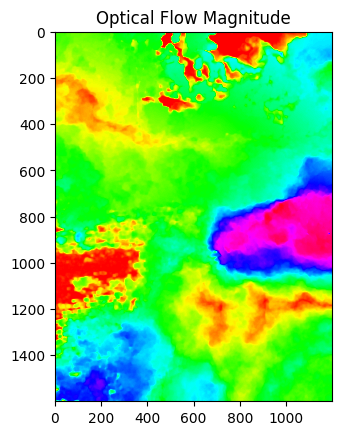

In [ ]:
prev = gray6
next = gray5
flow = cv.calcOpticalFlowFarneback(prev, next, None, pyr_scale=0.5, levels=5, winsize=11, iterations=5, poly_n=5, poly_sigma=1.1, flags=0)
hsv = np.zeros_like(prev)
hsv[..., 1] = 255
mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
plt.imshow(mag, cmap='hsv')
plt.title('Optical Flow Magnitude')

#### vegetation

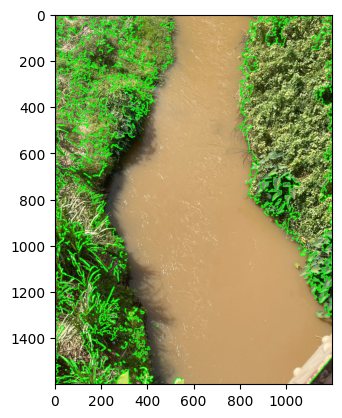

In [ ]:
_, thresholded_image = cv.threshold(edge_gaussian, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

kernel = np.ones((5, 5))
morph_image = cv.morphologyEx(thresholded_image, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(morph_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contour_image = cv.drawContours(image, contours, -1, (0, 255, 0), 2)

plt.imshow(cv.cvtColor(contour_image, cv.COLOR_BGR2RGB))
plt.show()

### Model Development

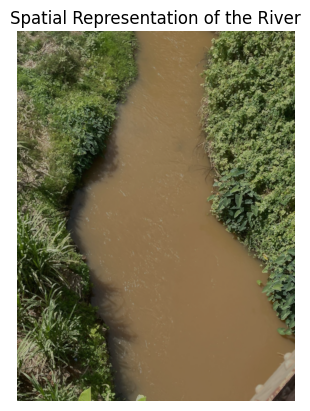

In [ ]:
# edge detection to mask
_, edge_mask = cv.threshold(edge_gaussian, 127, 255, cv.THRESH_BINARY)

spatial_representation = cv.addWeighted(denoised_gaussian, 0.7, cv.cvtColor(edge_mask, cv.COLOR_GRAY2BGR), 0.3, 0)

plt.imshow(cv.cvtColor(spatial_representation, cv.COLOR_BGR2RGB))
plt.title('Spatial Representation of the River')
plt.axis('off')
plt.show()

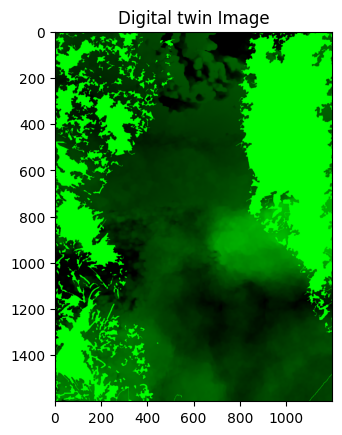

In [ ]:
digital_twin_model = np.zeros_like(image)

digital_twin_model[..., 1] = mag

# digital_twin_model[..., 1] = 255

digital_twin = cv.drawContours(digital_twin_model, contours, -1, (0, 255, 0), thickness=cv.FILLED)

plt.imshow(cv.cvtColor(digital_twin, cv.COLOR_BGR2RGB))
plt.title('Digital twin Image')
plt.show()